In [58]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False

In [59]:
#[ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
#[ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

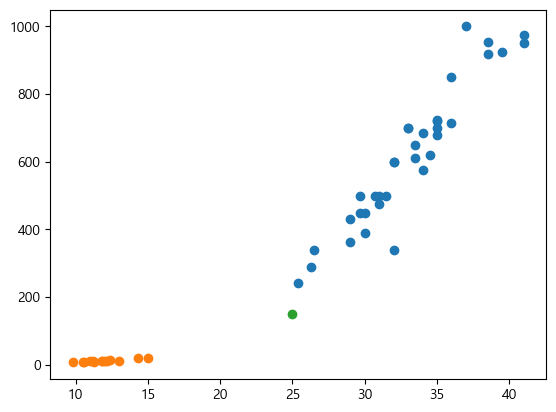

In [79]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(25,150)

In [61]:
len(bream_length) # 35 도미
len(smelt_length) # 14 빙어

14

In [62]:
# 1. 데이터 전처리
# train_input, test_input, train_target, test_target

In [63]:
### length -> 합치기 (bream_length,smelt_length)
### weight -> 합치기 (bream_weight,smelt_weight)
### datas = [ length, weight ] 합치기
### train_input,test_input,train_target,test_target

In [64]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [65]:
ran = [i for i in range(49)]
random.shuffle(ran)
ran

[31,
 41,
 36,
 32,
 12,
 27,
 15,
 39,
 3,
 8,
 22,
 11,
 40,
 5,
 44,
 28,
 43,
 21,
 45,
 37,
 47,
 13,
 14,
 34,
 25,
 33,
 4,
 17,
 42,
 20,
 18,
 38,
 9,
 1,
 30,
 46,
 19,
 48,
 16,
 0,
 10,
 35,
 6,
 23,
 7,
 26,
 29,
 24,
 2]

In [66]:
# T
result = [1]*35+[0]*14 # 도미1 빙어0
datas = [[l,w] for l,w in zip(length,weight)] # 이렇게 하는걸로
datas
df = pd.DataFrame(datas)
df['종류'] = result
df.index = ran
df

,0,1,종류
31,25.4,242.0,1
41,26.3,290.0,1
36,26.5,340.0,1
32,29.0,363.0,1
12,29.0,430.0,1
27,29.7,450.0,1
15,29.7,500.0,1
39,30.0,390.0,1
3,30.0,450.0,1
8,30.7,500.0,1


In [67]:
# datas = []
# for i in range(len(bream_length)+len(smelt_length)):
#     data = [length[i],weight[i]]
#     datas.append(data)
# datas

In [68]:
# 파이썬 랜덤
# 35개는 train_input, train_target
# 14개는 test_input, test_target

In [69]:
train_input = df.iloc[:35,:-1]
train_target = df.iloc[:35,-1]

test_input = df.iloc[35:,:-1]
test_target = df.iloc[35:,-1]

datas_input = df.iloc[:,:-1]
datas_target = df.iloc[:,-1]

# 자동으로 train, test데이터를 분리해준다
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(datas_input,datas_target)

In [73]:
test_input

,0,1
28,32.0,600.0
5,32.0,340.0
42,36.0,850.0
44,32.0,600.0
23,12.0,9.8
1,41.0,975.0
12,29.0,430.0
14,34.5,620.0
39,30.0,390.0
47,34.0,575.0


In [80]:
# 2. 데이터 학습시키기
clf = svm.SVC()
clf.fit(train_input,train_target)

# 3. 데이터 예측
result = clf.predict(test_input)
# 4. 정답률
score = metrics.accuracy_score(test_target,result)
print('정답률: ',score)

[0]


ValueError: Found input variables with inconsistent numbers of samples: [13, 1]

In [ ]:
# 데이터 학습하기
from sklearn.neighbors import KNeighborsClassifier
# clf = svm.SVC()
clf = KNeighborsClassifier
clf.fit(train_input,train_target)
# 데이터 예측
pre = clf.predict(test_input)


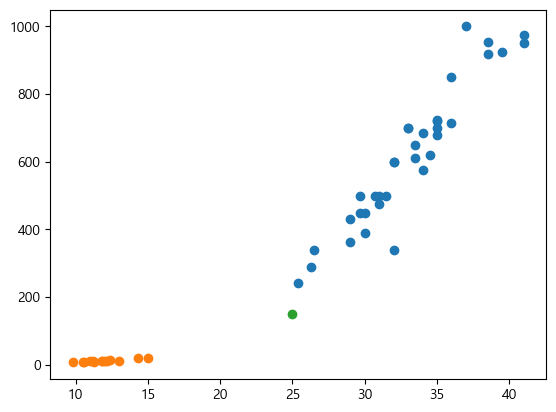

In [81]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(25,150)

In [82]:
# train_input 몇번째 index 데이터를 사용했는지 알려준다.
distances, indexs = clf.kneighbors([[25,150]])

AttributeError: 'SVC' object has no attribute 'kneighbors'